In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
def plot_series (time, series, format='-', start = 0, end = None, label = None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel('Time')
    plt.ylabel('Value')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [3]:
def trend(time, slope=0):
    return slope* time

### upward trending series

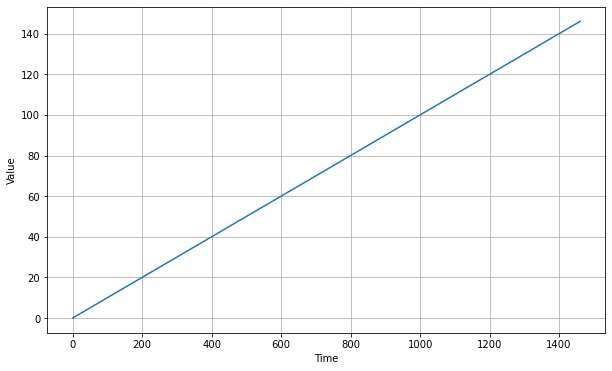

In [4]:

time = np.arange(4*365+1)
series = trend(time, 0.1)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [5]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 *np.pi),
                    1/np.exp(5* season_time))

In [6]:
def seasonality(time, period, amplitude =1, phase = 0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

### time series with seasonality

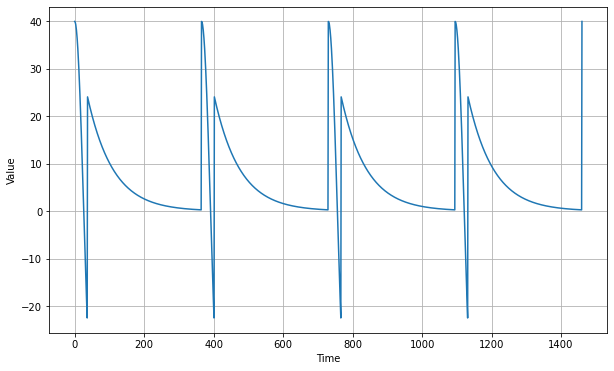

In [7]:
time = np.arange(4*365+1)
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()


### time series with seasonality and trend


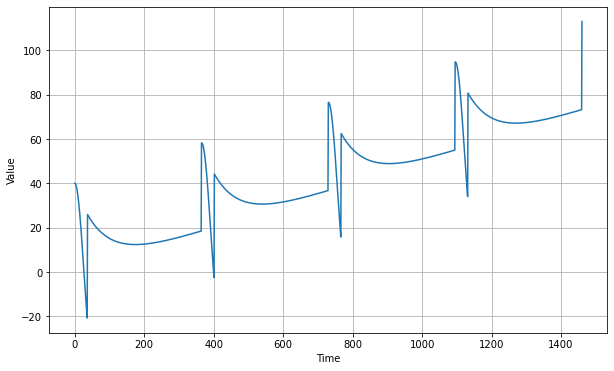

In [11]:
#time series with seasonality and trend
time = np.arange(4*365+1)
slope = 0.05
series = trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

### time series with seasonality and trend -- starting from a baseline

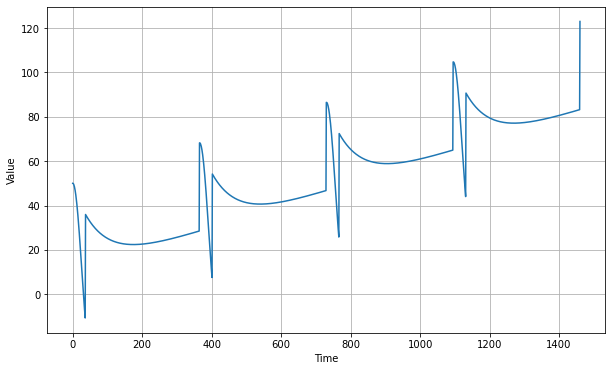

In [21]:
time = np.arange(4*365+1)
slope = 0.05
baselilne = 10
series = baselilne + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()


In [19]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

### noise

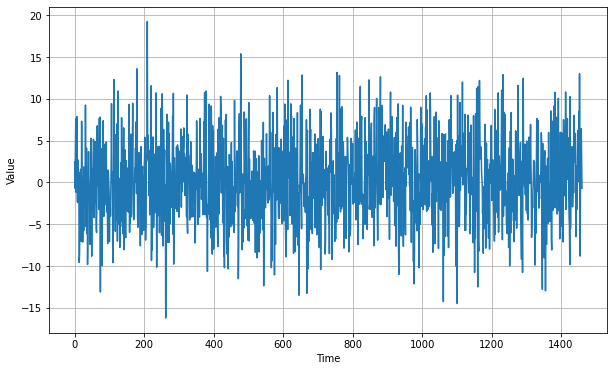

In [25]:
time = np.arange(4*365+1)
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

### noise + time series with seasonality and trend -- starting from a baseline


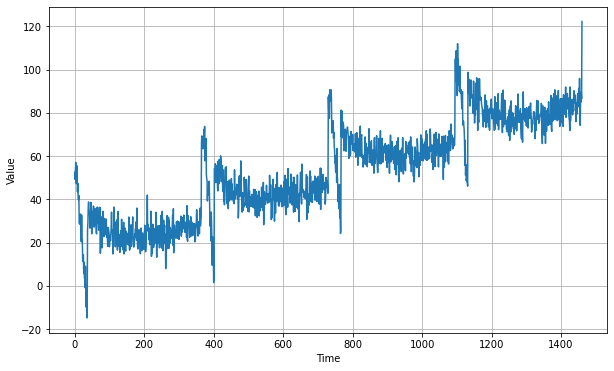

In [27]:
time = np.arange(4*365+1)
slope = 0.05
baselilne = 10
series = baselilne + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

series+= noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()


In [28]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    phi1 = 0.5
    phi2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]
    return ar[50:] * amplitude

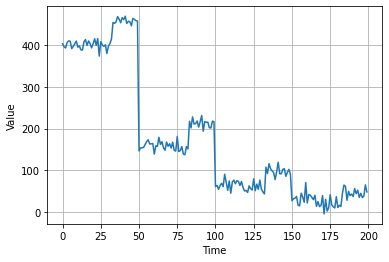

In [29]:
time = np.arange(4*365+1)
series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()


In [30]:
def autocorrelation2(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    phi1 = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += phi1 * ar[step - 1]
    return ar[1:] * amplitude

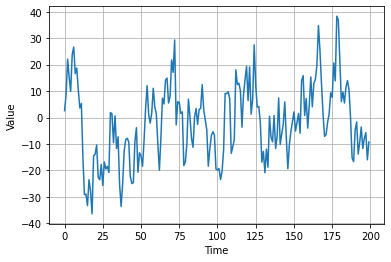

In [31]:
time = np.arange(4*365+1)
series = autocorrelation2(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()



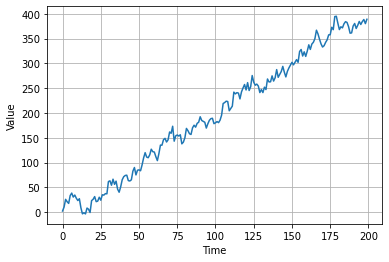

In [35]:
time = np.arange(4*365+1)
series = autocorrelation2(time, 10, seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

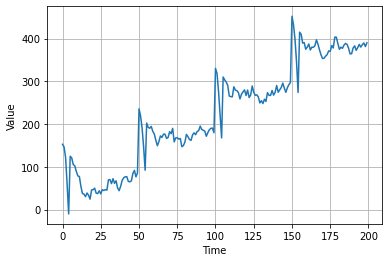

In [36]:
time = np.arange(4*365+1)
series = autocorrelation2(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()


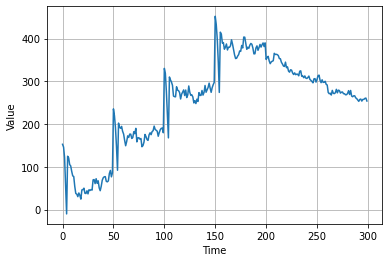

In [37]:
time = np.arange(4*365+1)
series = autocorrelation2(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation2(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
plot_series(time[:300], series[:300])
plt.show()


In [38]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size=10)
    series = np.zeros(len(time))
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude
    return series

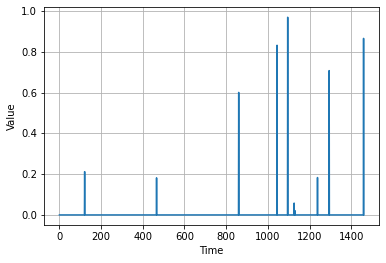

In [40]:
time = np.arange(4*365+1)
series = impulses(time, 10, seed=42)
plot_series(time, series)
plt.show()


In [41]:
def autocorrelation3(source, phi):
    ar = source.copy()
    max_lag = len(phi)
    for step, value in enumerate(source):
        for lag, phi1 in phi.items():
            if step - lag > 0:
              ar[step] += phi1 * ar[step - lag]
    return ar

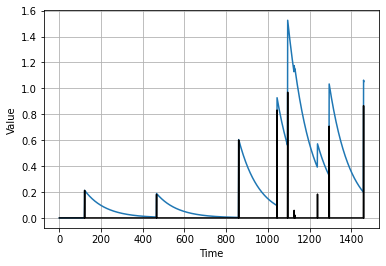

In [43]:
time = np.arange(4*365+1)
signal = impulses(time, 10, seed=42)
series = autocorrelation3(signal, {1: 0.99})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()


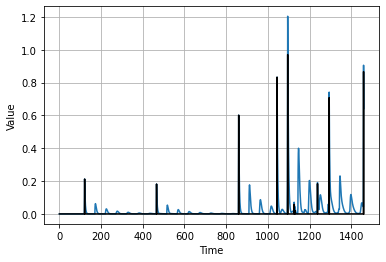

In [44]:
signal = impulses(time, 10, seed=42)
series = autocorrelation3(signal, {1: 0.70, 50: 0.2})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

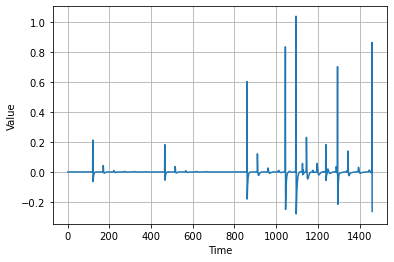

In [45]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

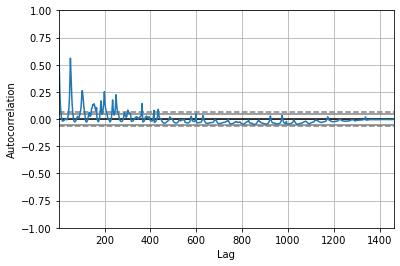

In [46]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

### set up the time series with seasonality, trend and noise.


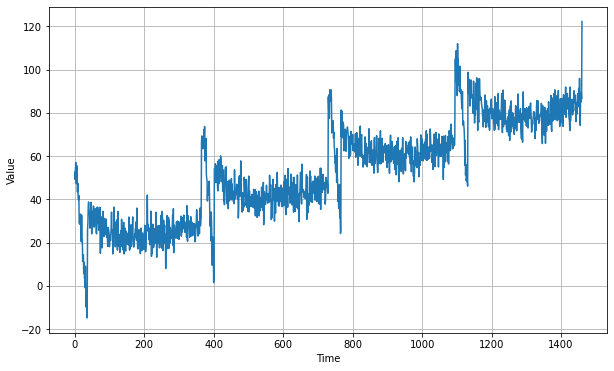

In [47]:
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

### Split the time series for training and validation

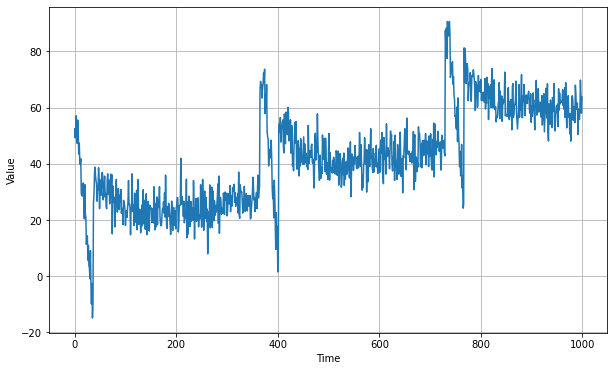

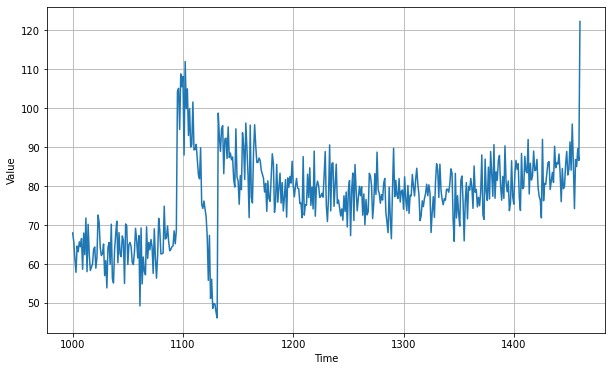

In [48]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

### 1. Naive Forecast
lags 1 step behind the time series.

In [49]:
naive_forecast = series[split_time - 1:-1]

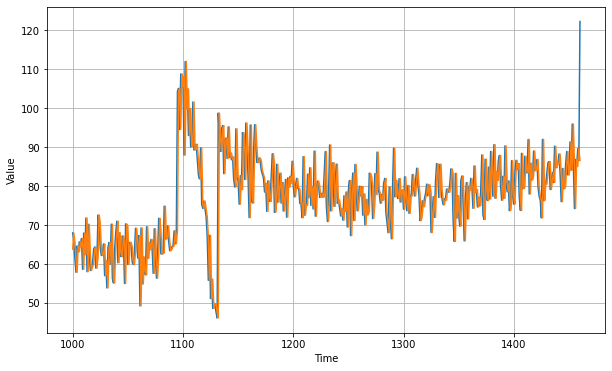

In [50]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

Zoom at validation


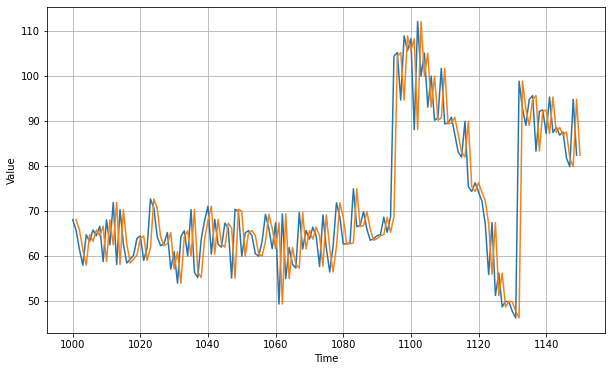

In [51]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period
This give the baseline

In [52]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

64.09308
5.952365


### 2. Moving Average Forecast

In [53]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

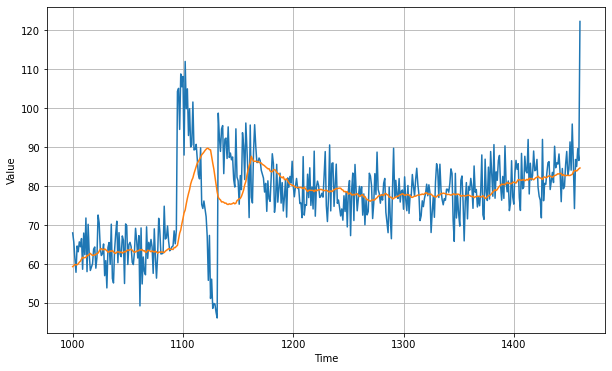

In [54]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [55]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

87.21982
6.0029397


worse than naive forecast!
The moving average does not anticipate trend or seasonality
remove them by using differencing.
Since the seasonality period is 365 days, subtract the value at time t – 365 from the value at time t.

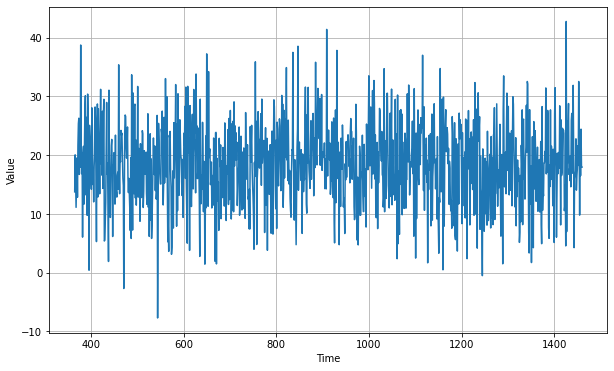

In [56]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

 Trend and seasonality have gone, find moving average:

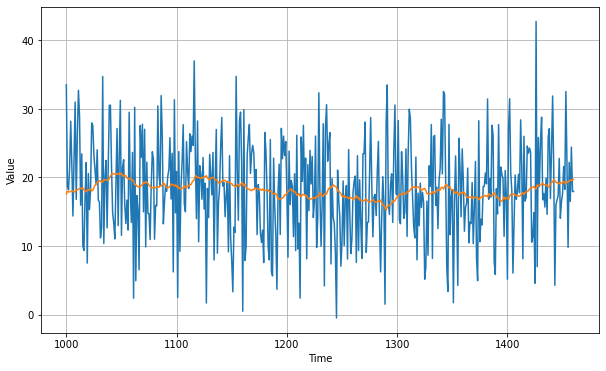

In [57]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

bring back the trend and seasonality by adding the past values from t – 365

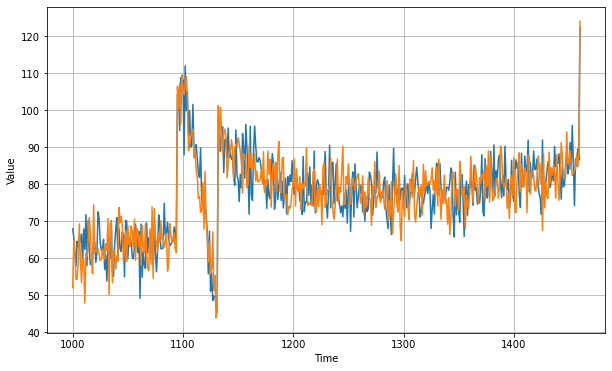

In [58]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [59]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

52.973663
5.839311


Better than naive forecast, good.
However the forecasts look a bit too random, because we're just adding past values, which were noisy.
'Let's use a moving averaging on past values to remove some of the noise:

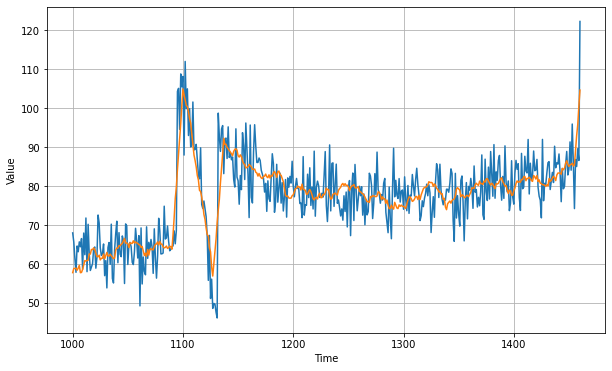

In [60]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [61]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())


36.848953
4.724803
